Multi-layer perception is a...

## Set-Up

In [5]:
import nHnN_MLP as nMLP
import functions as fun
import time
import matplotlib.pyplot as plt
import numpy as np

In [6]:
route = '../data/TMNIST_data.csv'
#route = 'insert your route here' 
testAmount = 1000
scale = 255
results = 10
rem_axis = "names"


test_y,test_x,train_y,train_x, pixels,train_trials,results = nMLP.process_data(route, testAmount, scale, results,rem_axis=rem_axis)

In [7]:
def train_and_evaluate(H, N, train_x, train_y, test_x, test_y, pixels, results, iters, alpha, act = None):
    start = time.time()
    params,training_accuracy, epoch_time = nMLP.gradient_descent(H, N, train_x, train_y, pixels, results, iters, alpha, act)
    total_duration = time.time() - start
    OUT_test, _, _ = nMLP.forward_propogation(test_x, params)
    preds = np.argmax(OUT_test, axis=0)
    test_acc = np.mean(preds == test_y)
    
    return test_acc, total_duration, training_accuracy, epoch_time

## Neurons-Per-Layer

In [8]:

#Define number of neurons
neurons = [2,4,8,10,16,32,64,128,256]

#Define data arrays
Ntest_accs = []
Ntotal_times = []
Nresults_dic = {}

#Collect Data
for N in neurons:
    print(f"neuron number:{N}") 
    test_acc, total_duration, training_accuracy, epoch_time = train_and_evaluate(H=2, N=N, train_x=train_x, train_y=train_y,test_x=test_x, test_y=test_y,pixels=pixels, results=10, iters=500, alpha=0.01)
    Ntest_accs.append(test_acc)
    Ntotal_times.append(total_duration)

    Nresults_dic[N] = {
        "acc": training_accuracy,
        "time": epoch_time
    }


neuron number:2
Iteration 0, Accuracy=0.0866
Iteration 100, Accuracy=0.0929
Iteration 200, Accuracy=0.0962
Iteration 300, Accuracy=0.1456
Iteration 400, Accuracy=0.1390
neuron number:4
Iteration 0, Accuracy=0.0960
Iteration 100, Accuracy=0.1427
Iteration 200, Accuracy=0.1799
Iteration 300, Accuracy=0.1947
Iteration 400, Accuracy=0.1965
neuron number:8
Iteration 0, Accuracy=0.0674
Iteration 100, Accuracy=0.2112
Iteration 200, Accuracy=0.2823
Iteration 300, Accuracy=0.3634
Iteration 400, Accuracy=0.4484
neuron number:10
Iteration 0, Accuracy=0.1209


KeyboardInterrupt: 

#### Accuracy vs. Hidden Layer Width

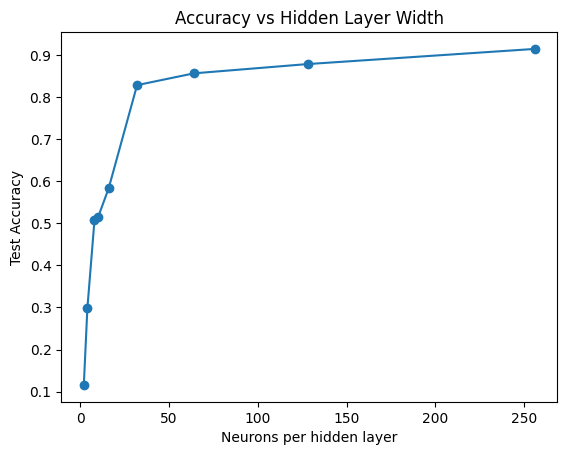

In [14]:
plt.plot(neurons, Ntest_accs, marker='o')
plt.xlabel("Neurons per hidden layer")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Hidden Layer Width")
plt.show()

#### Accuracy vs Normalized Training Time

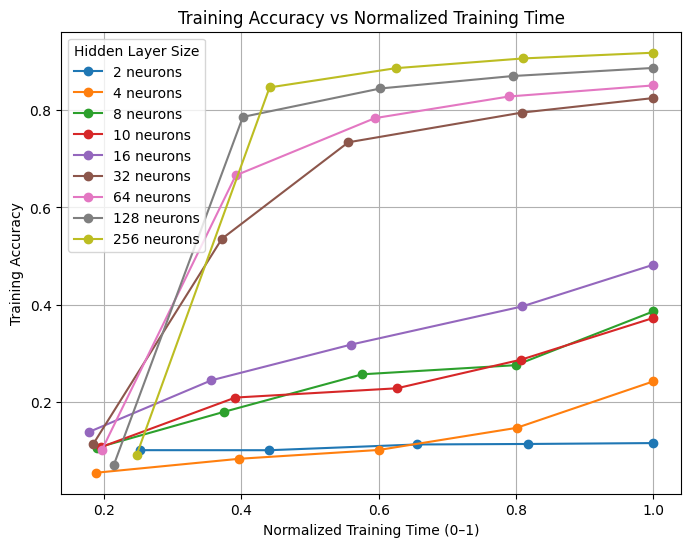

In [15]:
plt.figure(figsize=(8,6))

for idx, N in enumerate(Nresults_dic):
    times = np.array(Nresults_dic[N]["time"])
    accs = np.array(Nresults_dic[N]["acc"])
    
    cumulative_times = np.cumsum(times)
    norm_times = cumulative_times / cumulative_times[-1]
    
    plt.plot(norm_times, accs, marker='o', label=f"{N} neurons")

plt.xlabel("Normalized Training Time (0–1)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Normalized Training Time")
plt.legend(title="Hidden Layer Size")
plt.grid(True)
plt.show()

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

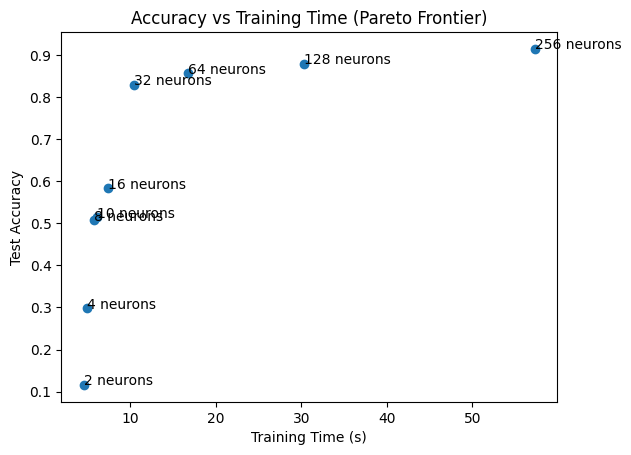

In [ ]:
plt.scatter(Ntotal_times, Ntest_accs)
for i, N in enumerate(neurons):
    plt.text(Ntotal_times[i], Ntest_accs[i], f"{N}")



plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

## Hidden Layer Number

In [19]:

#Define number of neurons
hidden_layers = [2,3,5,10,15]

#Define data arrays
Htest_accs = []
Htotal_times = []
Hresults_dic = {}

#Collect Data
for H in hidden_layers:
    print(f"number of layers:{H}")
    test_acc, total_duration,training_accuracy, epoch_time = train_and_evaluate(H=H, N=10, train_x=train_x, train_y=train_y,
                                                                                        test_x=test_x, test_y=test_y,
                                                                                        pixels=pixels, results=10, iters=500, alpha=0.01)
    Htest_accs.append(test_acc)
    Htotal_times.append(total_duration)
    Hresults_dic[H] = {
        "acc": training_accuracy,
        "time": epoch_time
    }


number of layers:2
Iteration:0
0.1689273356401384
Iteration:100
0.24837370242214532
Iteration:200
0.31442906574394464
Iteration:300
0.3495847750865052
Iteration:400
0.4026643598615917
number of layers:3
Iteration:0
0.08934256055363322
Iteration:100
0.11844290657439446
Iteration:200
0.20176470588235293
Iteration:300
0.2606228373702422
Iteration:400
0.27782006920415225
number of layers:5
Iteration:0
0.11083044982698961
Iteration:100
0.11809688581314878
Iteration:200
0.15650519031141868
Iteration:300
0.16771626297577855
Iteration:400
0.1793425605536332
number of layers:10
Iteration:0
0.0731833910034602
Iteration:100
0.10051903114186851
Iteration:200
0.10051903114186851
Iteration:300
0.10065743944636678
Iteration:400
0.10328719723183391
number of layers:15
Iteration:0
0.0989273356401384
Iteration:100
0.0989273356401384
Iteration:200
0.0989273356401384
Iteration:300
0.0989273356401384
Iteration:400
0.0989273356401384


#### Accuracy vs Hidden Layer Depth

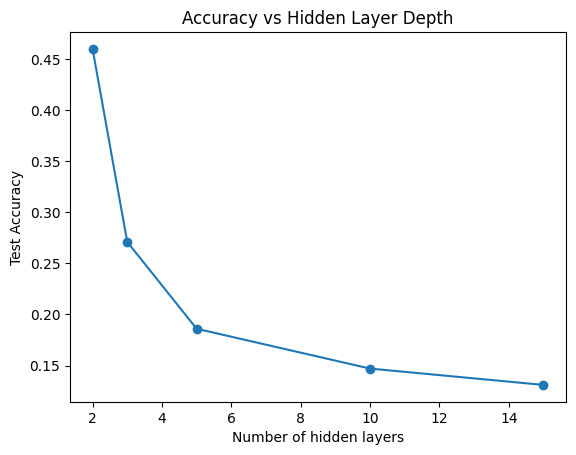

In [20]:
plt.plot(hidden_layers, Htest_accs, marker='o')
plt.xlabel("Number of hidden layers")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Hidden Layer Depth")
plt.show()

#### Training Accuracy vs Normalized Training Time

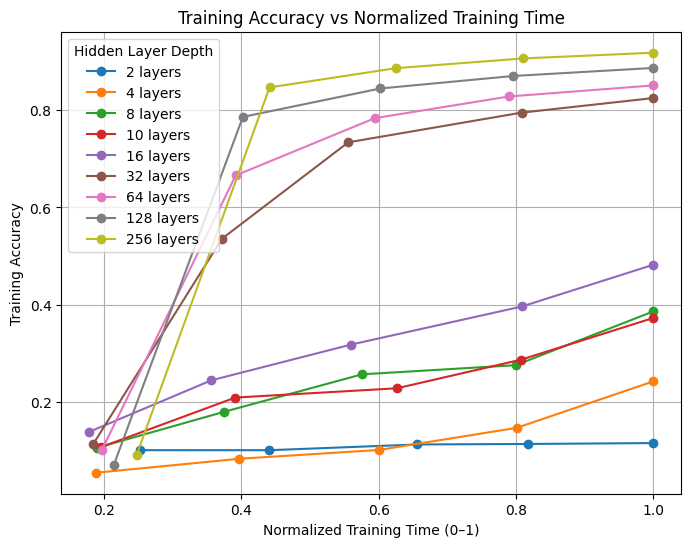

In [21]:
plt.figure(figsize=(8,6))

for idx, N in enumerate(Nresults_dic):
    times = np.array(Nresults_dic[N]["time"])
    accs = np.array(Nresults_dic[N]["acc"])
    
    cumulative_times = np.cumsum(times)
    norm_times = cumulative_times / cumulative_times[-1]
    
    plt.plot(norm_times, accs, marker='o', label=f"{N} layers")

plt.xlabel("Normalized Training Time (0–1)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Normalized Training Time")
plt.legend(title="Hidden Layer Depth")
plt.grid(True)
plt.show()

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

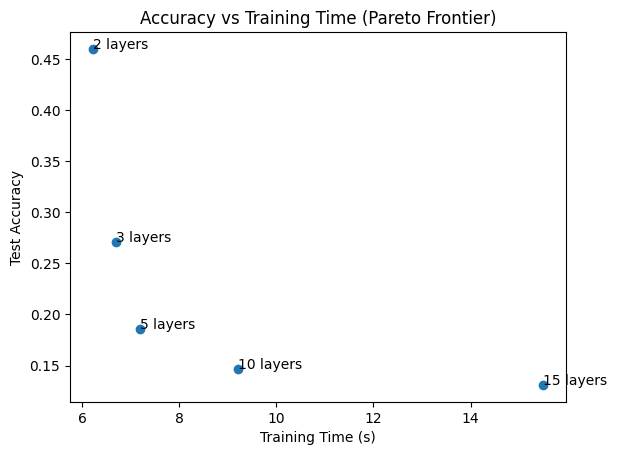

In [25]:
plt.scatter(Htotal_times, Htest_accs)
for i, H in enumerate(hidden_layers):
    plt.text(Htotal_times[i], Htest_accs[i], f"{H} layers")

plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

## Different Initializations

In [9]:

#Define number of neurons
initialization_function = "uniform"
#initialization_function = "xavier"
#initialization_function = "he"

#Define data arrays
Ntest_accs = []
Ntotal_times = []
Nresults_dic = {}

#Collect Data
for N in neurons:
    print(f"neuron number:{N}") 
    test_acc, total_duration, training_accuracy, epoch_time = train_and_evaluate(H=2, N=N, train_x=train_x, train_y=train_y,test_x=test_x, test_y=test_y,pixels=pixels, results=10, iters=500, alpha=0.01, act = initialization_function)
    Ntest_accs.append(test_acc)
    Ntotal_times.append(total_duration)

    Nresults_dic[N] = {
        "acc": training_accuracy,
        "time": epoch_time
    }


neuron number:2
Iteration 0, Accuracy=0.1000
Iteration 100, Accuracy=0.1522
Iteration 200, Accuracy=0.1609
Iteration 300, Accuracy=0.1722
Iteration 400, Accuracy=0.1953
neuron number:4
Iteration 0, Accuracy=0.0960
Iteration 100, Accuracy=0.1216
Iteration 200, Accuracy=0.1201
Iteration 300, Accuracy=0.1158
Iteration 400, Accuracy=0.1697


KeyboardInterrupt: 